<a href="https://colab.research.google.com/github/Sant18/Bike_Share_Analysis/blob/main/Bike_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving bikeshare.csv to bikeshare.csv


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import io

In [ ]:
df = pd.read_csv(io.BytesIO(uploaded['bikeshare.csv']))

In [ ]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
col = [i for i in df.columns]
typ = [df[i].dtype for i in df.columns]
uni = [df[i].unique() if len(df[i].unique()) < 10 else len(df[i].unique()) for i in df.columns]

pd.DataFrame(zip(col, typ, uni)).rename(columns={0:'Col', 1:'type', 2:'uni'}).sort_values(by='type')

,Col,type,uni
0,instant,int64,731
2,season,int64,"[1, 2, 3, 4]"
3,yr,int64,"[0, 1]"
4,mnth,int64,12
5,holiday,int64,"[0, 1]"
6,weekday,int64,"[6, 0, 1, 2, 3, 4, 5]"
7,workingday,int64,"[0, 1]"
8,weathersit,int64,"[2, 1, 3]"
13,casual,int64,606
14,registered,int64,679


In [ ]:
col = [i for i in df.columns]
null = [round((df[i].isnull().sum()/df.shape[0])*100,2) for i in df.columns]

df_ = pd.DataFrame(zip(col, null)).rename(columns={0:'Col', 1:'Null'}).sort_values(by='Null')
df_.loc[df_['Null'] != 0]

,Col,Null


In [ ]:
df['temp'] = df['temp'].apply(lambda x: round(x, 2))
df['atemp'] = df['atemp'].apply(lambda x: round(x, 2))
df['hum'] = df['hum'].apply(lambda x: round(x, 2))
df['windspeed'] = df['windspeed'].apply(lambda x: round(x, 2))

In [ ]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.34,0.36,0.81,0.16,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.36,0.35,0.70,0.25,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.20,0.19,0.44,0.25,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.20,0.21,0.59,0.16,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.23,0.23,0.44,0.19,82,1518,1600


In [ ]:
def extract_date(x):
    return x.split('-')[0].strip()

In [ ]:
df['dteday'][0].split('-')[0]

'2011'

In [ ]:
df['year_'] = df['dteday'].apply(extract_date)

In [ ]:
def extract_month(x):
  if (x is np.nan or x is None):
    return np.nan
  else:
    return x.split('-')[1].split('-')[0].strip()

In [ ]:
df['month'] = df['dteday'].apply(extract_month)

In [ ]:
df['month'] = df['month'].astype('int')

In [ ]:
def add_month(x):
  if x == 1:
    return 'Jan'
  elif x == 2:
    return 'Feb'
  elif x == 3:
    return 'Mar'
  elif x == 4:
    return 'Apr'
  elif x == 5:
    return 'May'
  elif x == 6:
    return 'Jun'
  elif x == 7:
    return 'Jul'
  elif x == 8:
    return 'Aug'
  elif x == 9:
    return 'Sep'
  elif x == 10:
    return 'Oct'
  elif x == 11:
    return 'Nov'
  elif x == 12:
    return 'Dec'
  else:
    return np.nan

In [ ]:
df['Month_'] = df['month'].apply(add_month)

In [ ]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,year_,month,Month_
0,1,2011-01-01,1,0,1,0,6,0,2,0.34,0.36,0.81,0.16,331,654,985,2011,1,Jan
1,2,2011-01-02,1,0,1,0,0,0,2,0.36,0.35,0.70,0.25,131,670,801,2011,1,Jan
2,3,2011-01-03,1,0,1,0,1,1,1,0.20,0.19,0.44,0.25,120,1229,1349,2011,1,Jan
3,4,2011-01-04,1,0,1,0,2,1,1,0.20,0.21,0.59,0.16,108,1454,1562,2011,1,Jan
4,5,2011-01-05,1,0,1,0,3,1,1,0.23,0.23,0.44,0.19,82,1518,1600,2011,1,Jan


In [ ]:
#df.drop('year', axis=1)

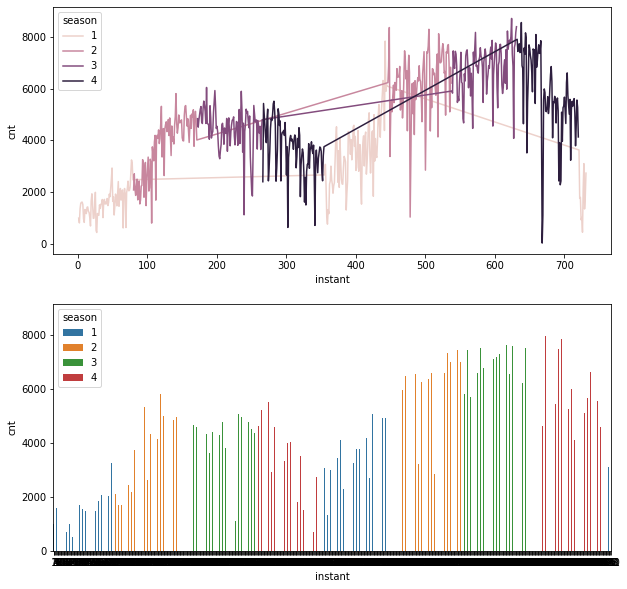

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(10,10))

sns.lineplot(x='instant', y='cnt', data=df, ax=ax[0], hue='season')
sns.barplot(x='instant', y='cnt', data=df, ax=ax[1], hue='season')
plt.show()

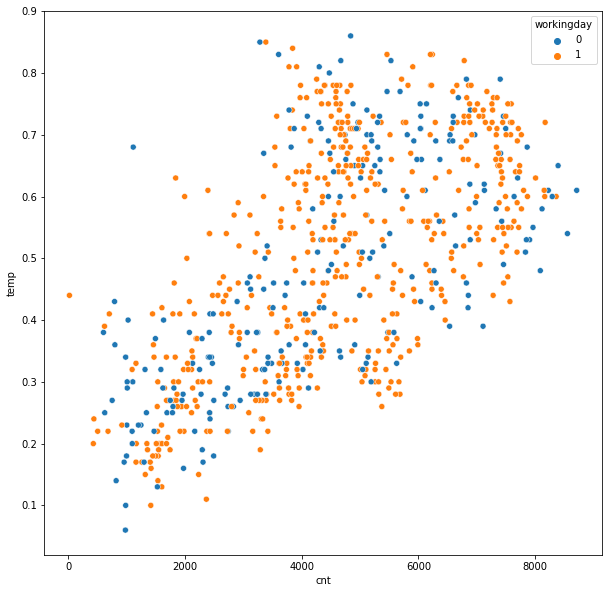

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))

sns.scatterplot(x='cnt', y='temp', data=df, hue='workingday')
plt.show()

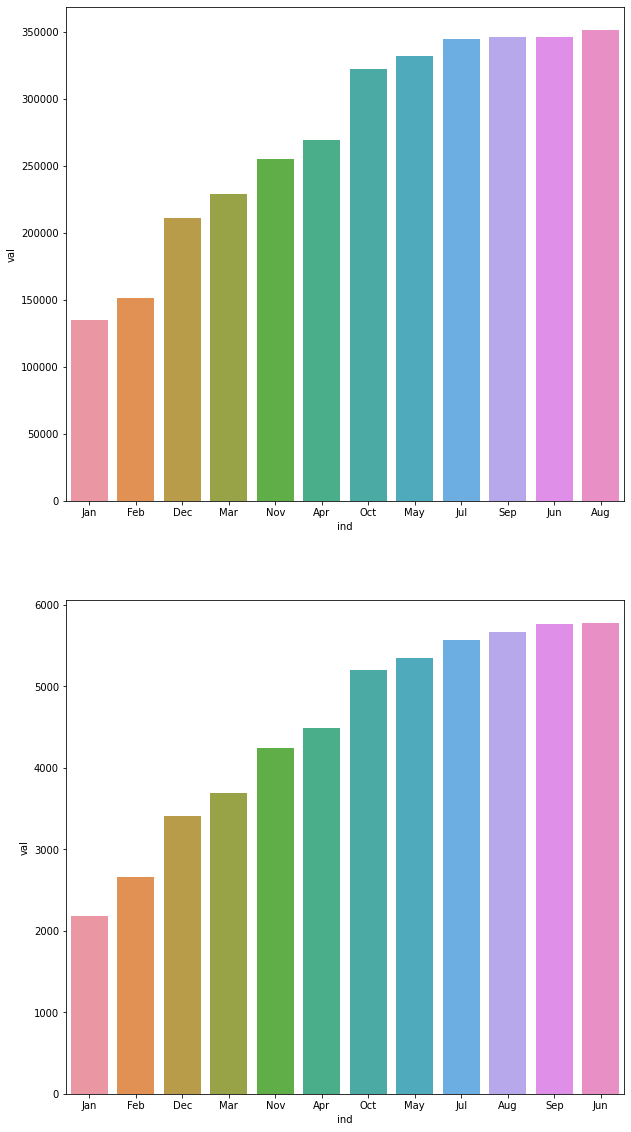

In [ ]:
ind_s = df.groupby(['Month_'])['cnt'].sum().index
val_s = df.groupby(['Month_'])['cnt'].sum().values

df_s = pd.DataFrame(zip(ind_s, val_s)).rename(columns={0:'ind', 1:'val'}).sort_values(by='val')

ind_m = df.groupby(['Month_'])['cnt'].mean().index
val_m = df.groupby(['Month_'])['cnt'].mean().values

df_m = pd.DataFrame(zip(ind_m, val_m)).rename(columns={0:'ind', 1:'val'}).sort_values(by='val')

fig, ax = plt.subplots(2, 1, figsize=(10, 20))

sns.barplot(x='ind', y='val', data=df_s, ax=ax[0])
sns.barplot(x='ind', y='val', data=df_m, ax=ax[1])

In [ ]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,year_,month,Month_
0,1,2011-01-01,1,0,1,0,6,0,2,0.34,0.36,0.81,0.16,331,654,985,2011,1,Jan
1,2,2011-01-02,1,0,1,0,0,0,2,0.36,0.35,0.70,0.25,131,670,801,2011,1,Jan
2,3,2011-01-03,1,0,1,0,1,1,1,0.20,0.19,0.44,0.25,120,1229,1349,2011,1,Jan
3,4,2011-01-04,1,0,1,0,2,1,1,0.20,0.21,0.59,0.16,108,1454,1562,2011,1,Jan
4,5,2011-01-05,1,0,1,0,3,1,1,0.23,0.23,0.44,0.19,82,1518,1600,2011,1,Jan


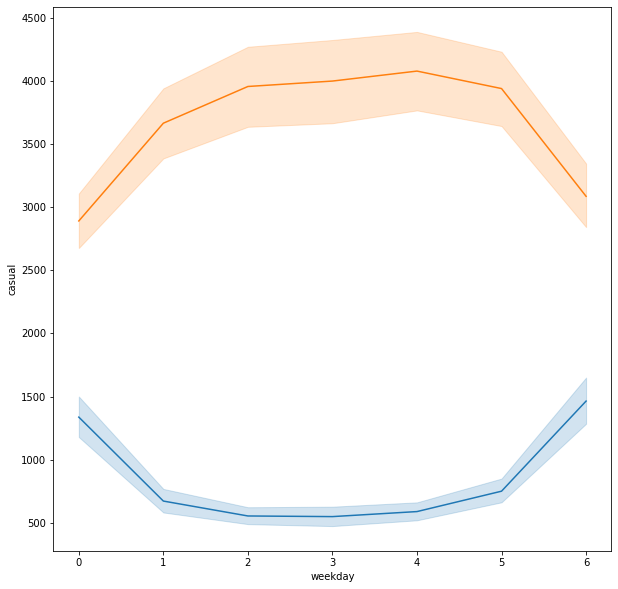

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))

sns.lineplot(x='weekday', y='casual', data=df)
sns.lineplot(x='weekday', y='registered', data=df)
#day = ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']

plt.show()

In [ ]:
df['workingday'].value_counts()

1    500
0    231
Name: workingday, dtype: int64

Casual
Registered


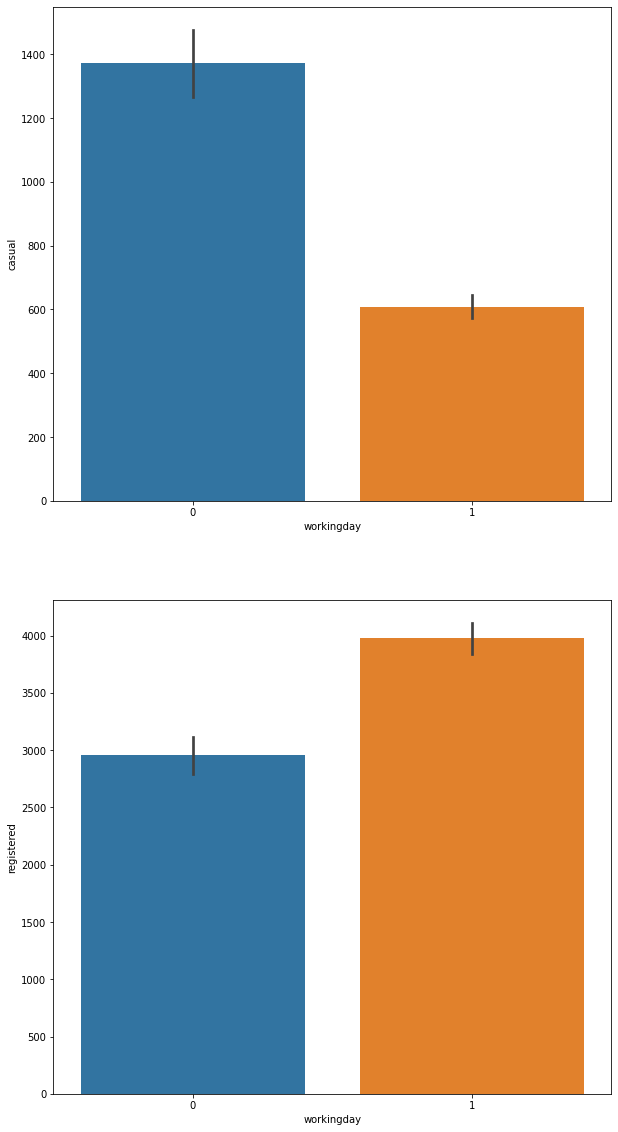

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(10, 20))

print('Casual')
sns.barplot(x='workingday', y='casual', data=df, ax=ax[0])

print('Registered')
sns.barplot(x='workingday', y='registered', data=df, ax=ax[1])
plt.show()

In [ ]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,year_,month,Month_
0,1,2011-01-01,1,0,1,0,6,0,2,0.34,0.36,0.81,0.16,331,654,985,2011,1,Jan
1,2,2011-01-02,1,0,1,0,0,0,2,0.36,0.35,0.70,0.25,131,670,801,2011,1,Jan
2,3,2011-01-03,1,0,1,0,1,1,1,0.20,0.19,0.44,0.25,120,1229,1349,2011,1,Jan
3,4,2011-01-04,1,0,1,0,2,1,1,0.20,0.21,0.59,0.16,108,1454,1562,2011,1,Jan
4,5,2011-01-05,1,0,1,0,3,1,1,0.23,0.23,0.44,0.19,82,1518,1600,2011,1,Jan


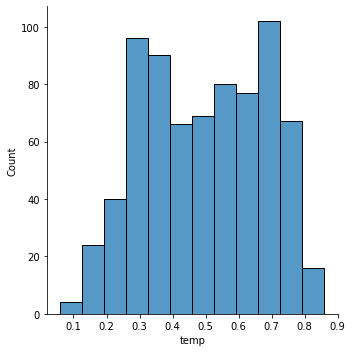

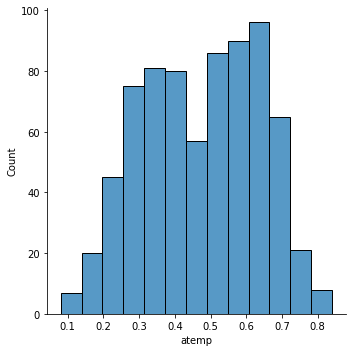

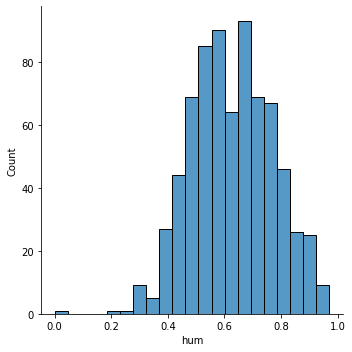

In [ ]:
sns.displot(x='temp', data=df)
sns.displot(x='atemp', data=df)
sns.displot(x='hum', data=df)

plt.show()

In [ ]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,year_,month,Month_
0,1,2011-01-01,1,0,1,0,6,0,2,0.34,0.36,0.81,0.16,331,654,985,2011,1,Jan
1,2,2011-01-02,1,0,1,0,0,0,2,0.36,0.35,0.70,0.25,131,670,801,2011,1,Jan
2,3,2011-01-03,1,0,1,0,1,1,1,0.20,0.19,0.44,0.25,120,1229,1349,2011,1,Jan
3,4,2011-01-04,1,0,1,0,2,1,1,0.20,0.21,0.59,0.16,108,1454,1562,2011,1,Jan
4,5,2011-01-05,1,0,1,0,3,1,1,0.23,0.23,0.44,0.19,82,1518,1600,2011,1,Jan


In [ ]:
df_low = df.loc[df['temp'] < 0.5]
df_high = df.loc[df['temp'] > 0.5]

pd.Series(df_high['cnt'].sum())
pd.DataFrame(pd.Series(df_low['cnt'].sum()))

,0
0,1233110


In [ ]:
pd.DataFrame(df.groupby('season')['cnt'].mean()).sort_values(by='cnt', ascending=False)

,cnt
season,
3,5644.303191
2,4992.331522
4,4728.162921
1,2604.132597


In [ ]:
df_low.groupby('season')['casual'].mean()

season
1     294.889535
2     865.901639
3    1088.000000
4     594.782946
Name: casual, dtype: float64

In [ ]:
df_high.groupby('season')['casual'].mean()

season
1    1100.111111
2    1236.110169
3    1203.844086
4    1100.041667
Name: casual, dtype: float64

In [ ]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,year_,month,Month_
0,1,2011-01-01,1,0,1,0,6,0,2,0.34,0.36,0.81,0.16,331,654,985,2011,1,Jan
1,2,2011-01-02,1,0,1,0,0,0,2,0.36,0.35,0.70,0.25,131,670,801,2011,1,Jan
2,3,2011-01-03,1,0,1,0,1,1,1,0.20,0.19,0.44,0.25,120,1229,1349,2011,1,Jan
3,4,2011-01-04,1,0,1,0,2,1,1,0.20,0.21,0.59,0.16,108,1454,1562,2011,1,Jan
4,5,2011-01-05,1,0,1,0,3,1,1,0.23,0.23,0.44,0.19,82,1518,1600,2011,1,Jan


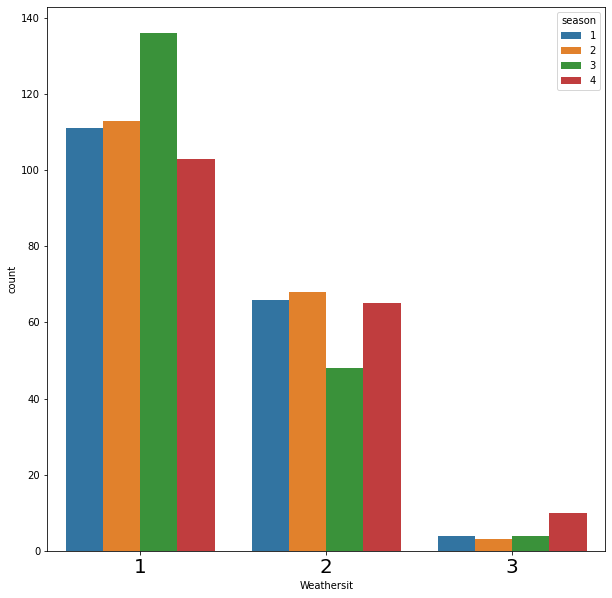

In [ ]:
df.weathersit.value_counts()

fig, ax = plt.subplots(figsize=(10, 10))

sns.countplot(x='weathersit', data=df, ax=ax, hue='season')
ax.set_xticklabels(['1', '2', '3'], fontsize=20)
ax.set_xlabel('Weathersit', fontsize=10)
plt.show()

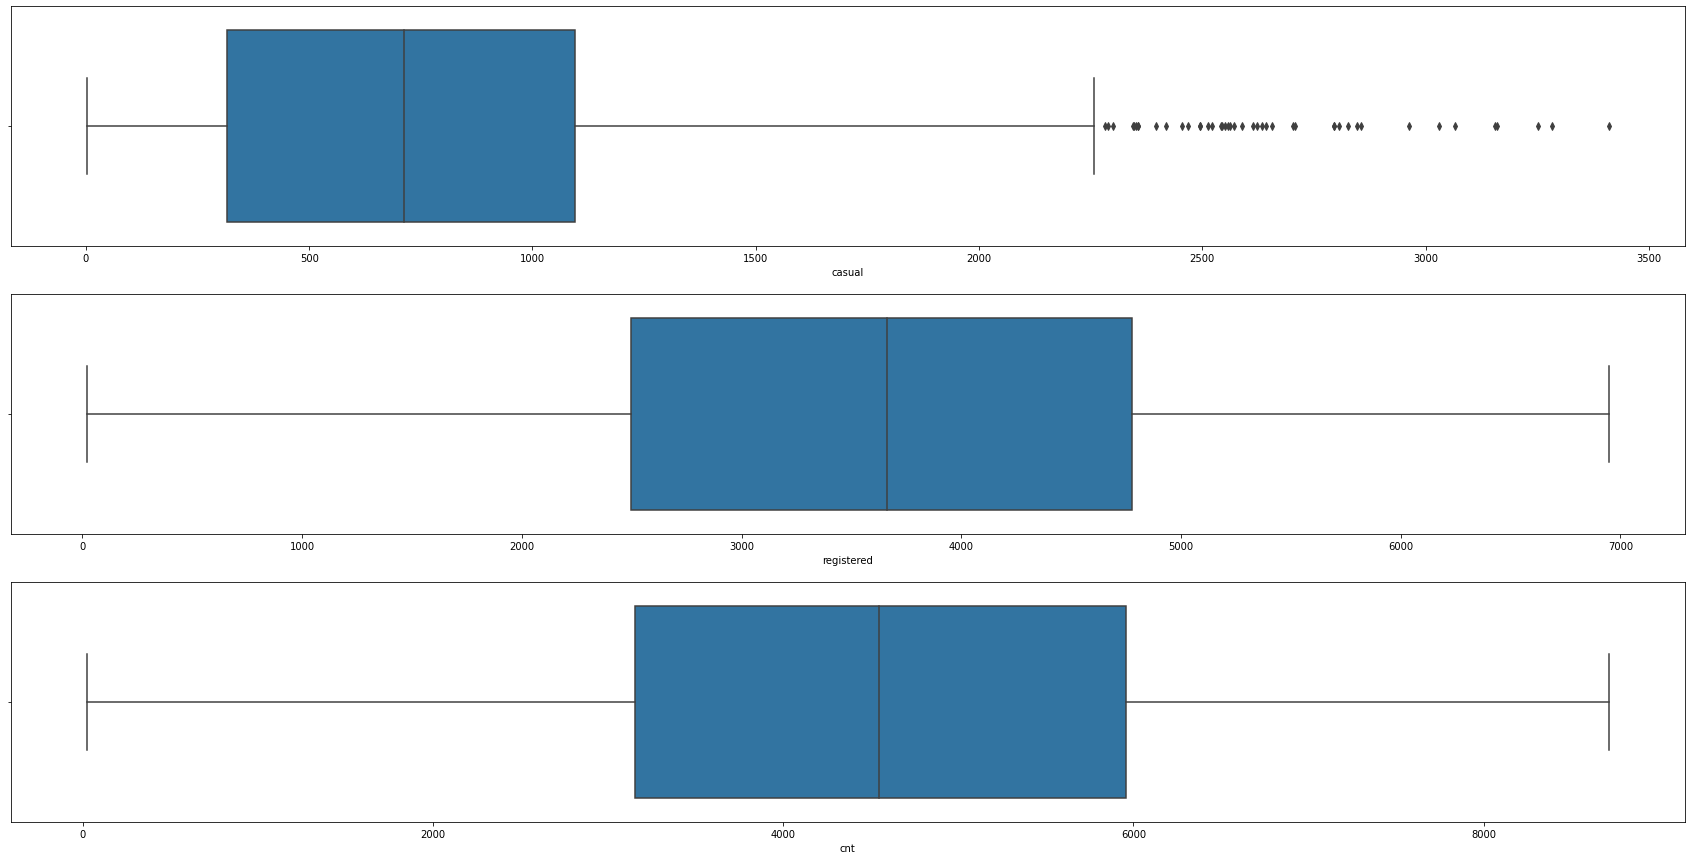

In [ ]:
fig, ax = plt.subplots(3, 1, figsize=(30, 15))

cols = ['casual', 'registered', 'cnt']

for i in range(0, len(cols)):
  sns.boxplot(x=cols[i], data=df, ax=ax[i])

plt.show()

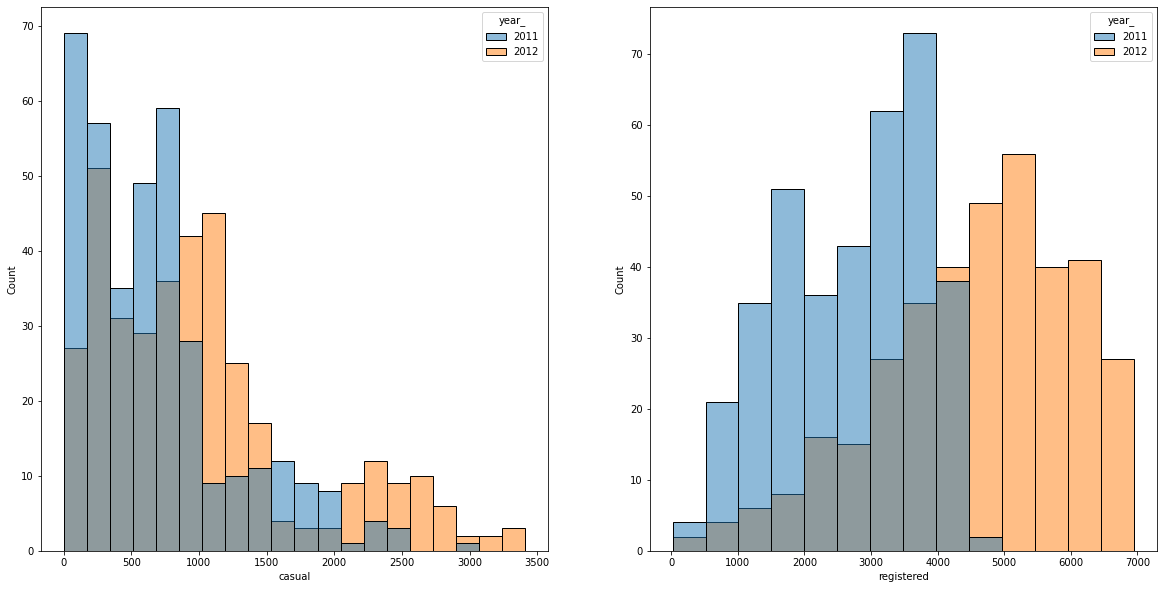

1.2664540319434734

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(20, 10))

sns.histplot(x='casual', data=df, ax=ax[0], hue='year_')
sns.histplot(x='registered', data=df, ax=ax[1], hue='year_')
plt.show()

df['casual'].skew()

In [ ]:
df[['holiday', 'weekday']].head(10)

,holiday,weekday
0,0,6
1,0,0
2,0,1
3,0,2
4,0,3
5,0,4
6,0,5
7,0,6
8,0,0
9,0,1


In [ ]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,year_,month,Month_
0,1,2011-01-01,1,0,1,0,6,0,2,0.34,0.36,0.81,0.16,331,654,985,2011,1,Jan
1,2,2011-01-02,1,0,1,0,0,0,2,0.36,0.35,0.70,0.25,131,670,801,2011,1,Jan
2,3,2011-01-03,1,0,1,0,1,1,1,0.20,0.19,0.44,0.25,120,1229,1349,2011,1,Jan
3,4,2011-01-04,1,0,1,0,2,1,1,0.20,0.21,0.59,0.16,108,1454,1562,2011,1,Jan
4,5,2011-01-05,1,0,1,0,3,1,1,0.23,0.23,0.44,0.19,82,1518,1600,2011,1,Jan


In [ ]:
pd.DataFrame(abs(df.corr()['cnt'])).sort_values(by='cnt', ascending=False)

,cnt
cnt,1.000000
registered,0.945517
casual,0.672804
atemp,0.630491
instant,0.628830
temp,0.626897
yr,0.566710
season,0.406100
weathersit,0.297391
mnth,0.279977


In [ ]:
df['temp-wind'] = df['temp'] * df['windspeed']

In [ ]:
pd.DataFrame(abs(df.corr()['cnt'])).sort_values(by='cnt', ascending=False)

,cnt
cnt,1.000000
registered,0.945517
casual,0.672804
atemp,0.630491
instant,0.628830
temp,0.626897
yr,0.566710
season,0.406100
weathersit,0.297391
temp-wind,0.285024


In [ ]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,year_,month,Month_,temp-wind
0,1,2011-01-01,1,0,1,0,6,0,2,0.34,0.36,0.81,0.16,331,654,985,2011,1,Jan,0.0544
1,2,2011-01-02,1,0,1,0,0,0,2,0.36,0.35,0.70,0.25,131,670,801,2011,1,Jan,0.0900
2,3,2011-01-03,1,0,1,0,1,1,1,0.20,0.19,0.44,0.25,120,1229,1349,2011,1,Jan,0.0500
3,4,2011-01-04,1,0,1,0,2,1,1,0.20,0.21,0.59,0.16,108,1454,1562,2011,1,Jan,0.0320
4,5,2011-01-05,1,0,1,0,3,1,1,0.23,0.23,0.44,0.19,82,1518,1600,2011,1,Jan,0.0437


In [ ]:
df['dteday'] = df['dteday'].apply(lambda x: x.replace('-', '/'))

In [ ]:
df['dteday'].head()

0    2011/01/01
1    2011/01/02
2    2011/01/03
3    2011/01/04
4    2011/01/05
Name: dteday, dtype: object

In [ ]:
df['day'] = df['dteday'].apply(lambda x: x.split('/')[2])

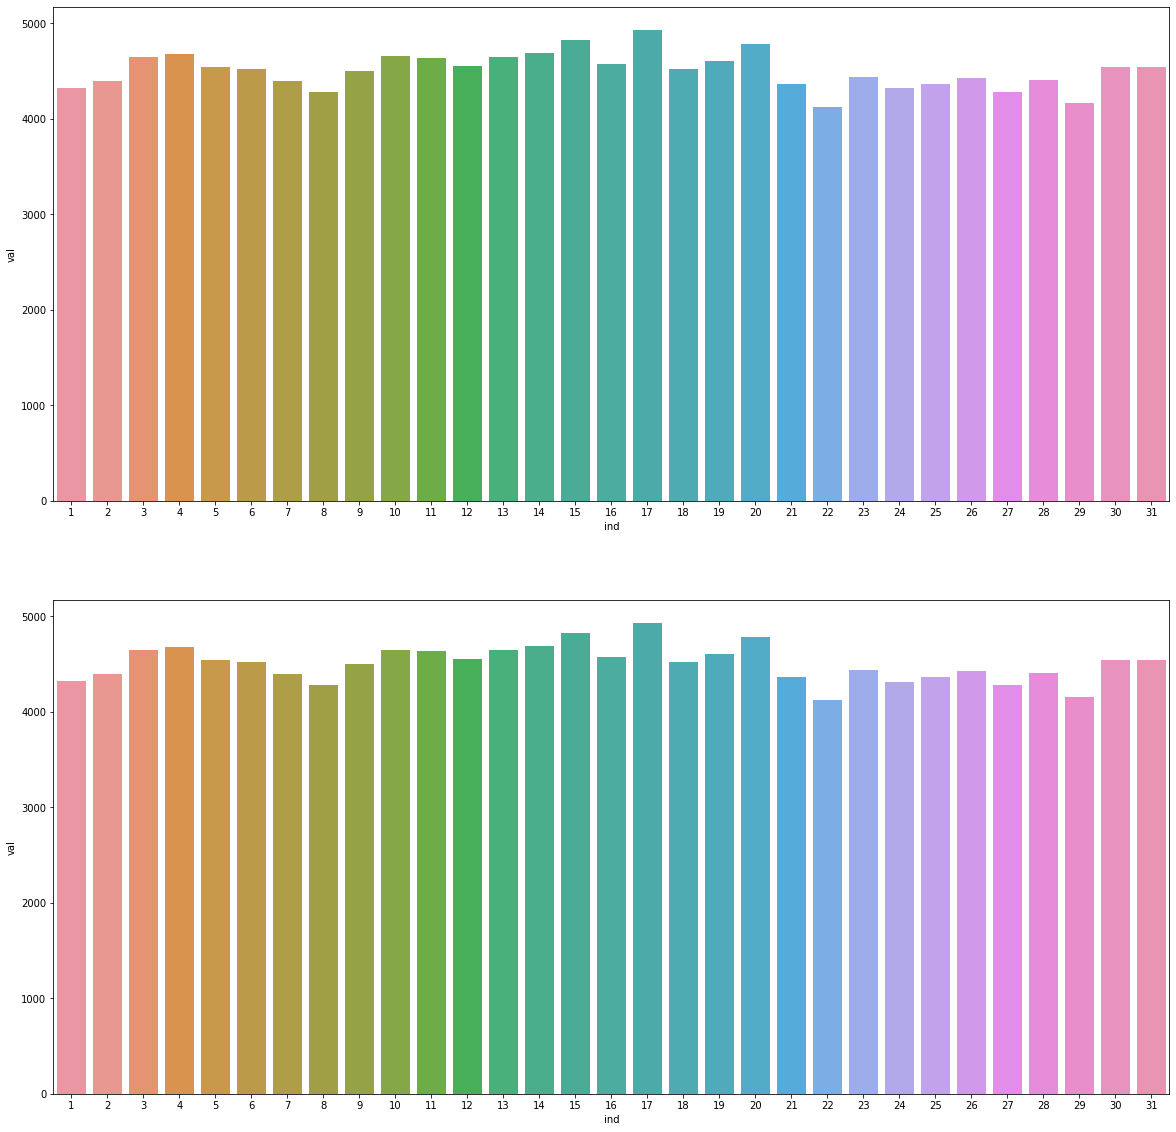

In [ ]:
df_  = pd.DataFrame(round(df.groupby(['day'])['cnt'].mean(), 2))
ind = df_.index
val = df_.values
val = np.squeeze(val)
df_new = pd.DataFrame(zip(ind, val)).rename(columns={0:'ind', 1:'val'})
df_new['ind'] = df_new['ind'].astype(int)
df_new['val'] = df_new['val'].astype(int)
df_new_ = df_new.sort_values(by='val', ascending=True)
fig, ax = plt.subplots(2, 1, figsize=(20, 20))
sns.barplot(x='ind', y='val', data=df_new, ax=ax[0])
sns.barplot(x='ind', y='val', data=df_new_, ax=ax[1])
plt.show()


In [ ]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,year_,month,Month_,temp-wind,day
0,1,2011/01/01,1,0,1,0,6,0,2,0.34,0.36,0.81,0.16,331,654,985,2011,1,Jan,0.0544,01
1,2,2011/01/02,1,0,1,0,0,0,2,0.36,0.35,0.70,0.25,131,670,801,2011,1,Jan,0.0900,02
2,3,2011/01/03,1,0,1,0,1,1,1,0.20,0.19,0.44,0.25,120,1229,1349,2011,1,Jan,0.0500,03
3,4,2011/01/04,1,0,1,0,2,1,1,0.20,0.21,0.59,0.16,108,1454,1562,2011,1,Jan,0.0320,04
4,5,2011/01/05,1,0,1,0,3,1,1,0.23,0.23,0.44,0.19,82,1518,1600,2011,1,Jan,0.0437,05


In [ ]:
df['bins'] = pd.qcut(df['cnt'], 3, ['low', 'med', 'high'])

In [ ]:
df['bins'].value_counts()

med     244
low     244
high    243
Name: bins, dtype: int64

In [ ]:
pd.DataFrame(round(df.groupby('bins')['temp'].mean()*100,2))

,temp
bins,
low,33.34
med,55.84
high,59.47


In [ ]:
df['cnt_cumsum'] = df['cnt'].cumsum()

In [ ]:
df['cas_cm'] = df['casual'].cumsum()
df['reg_cm'] = df['registered'].cumsum()

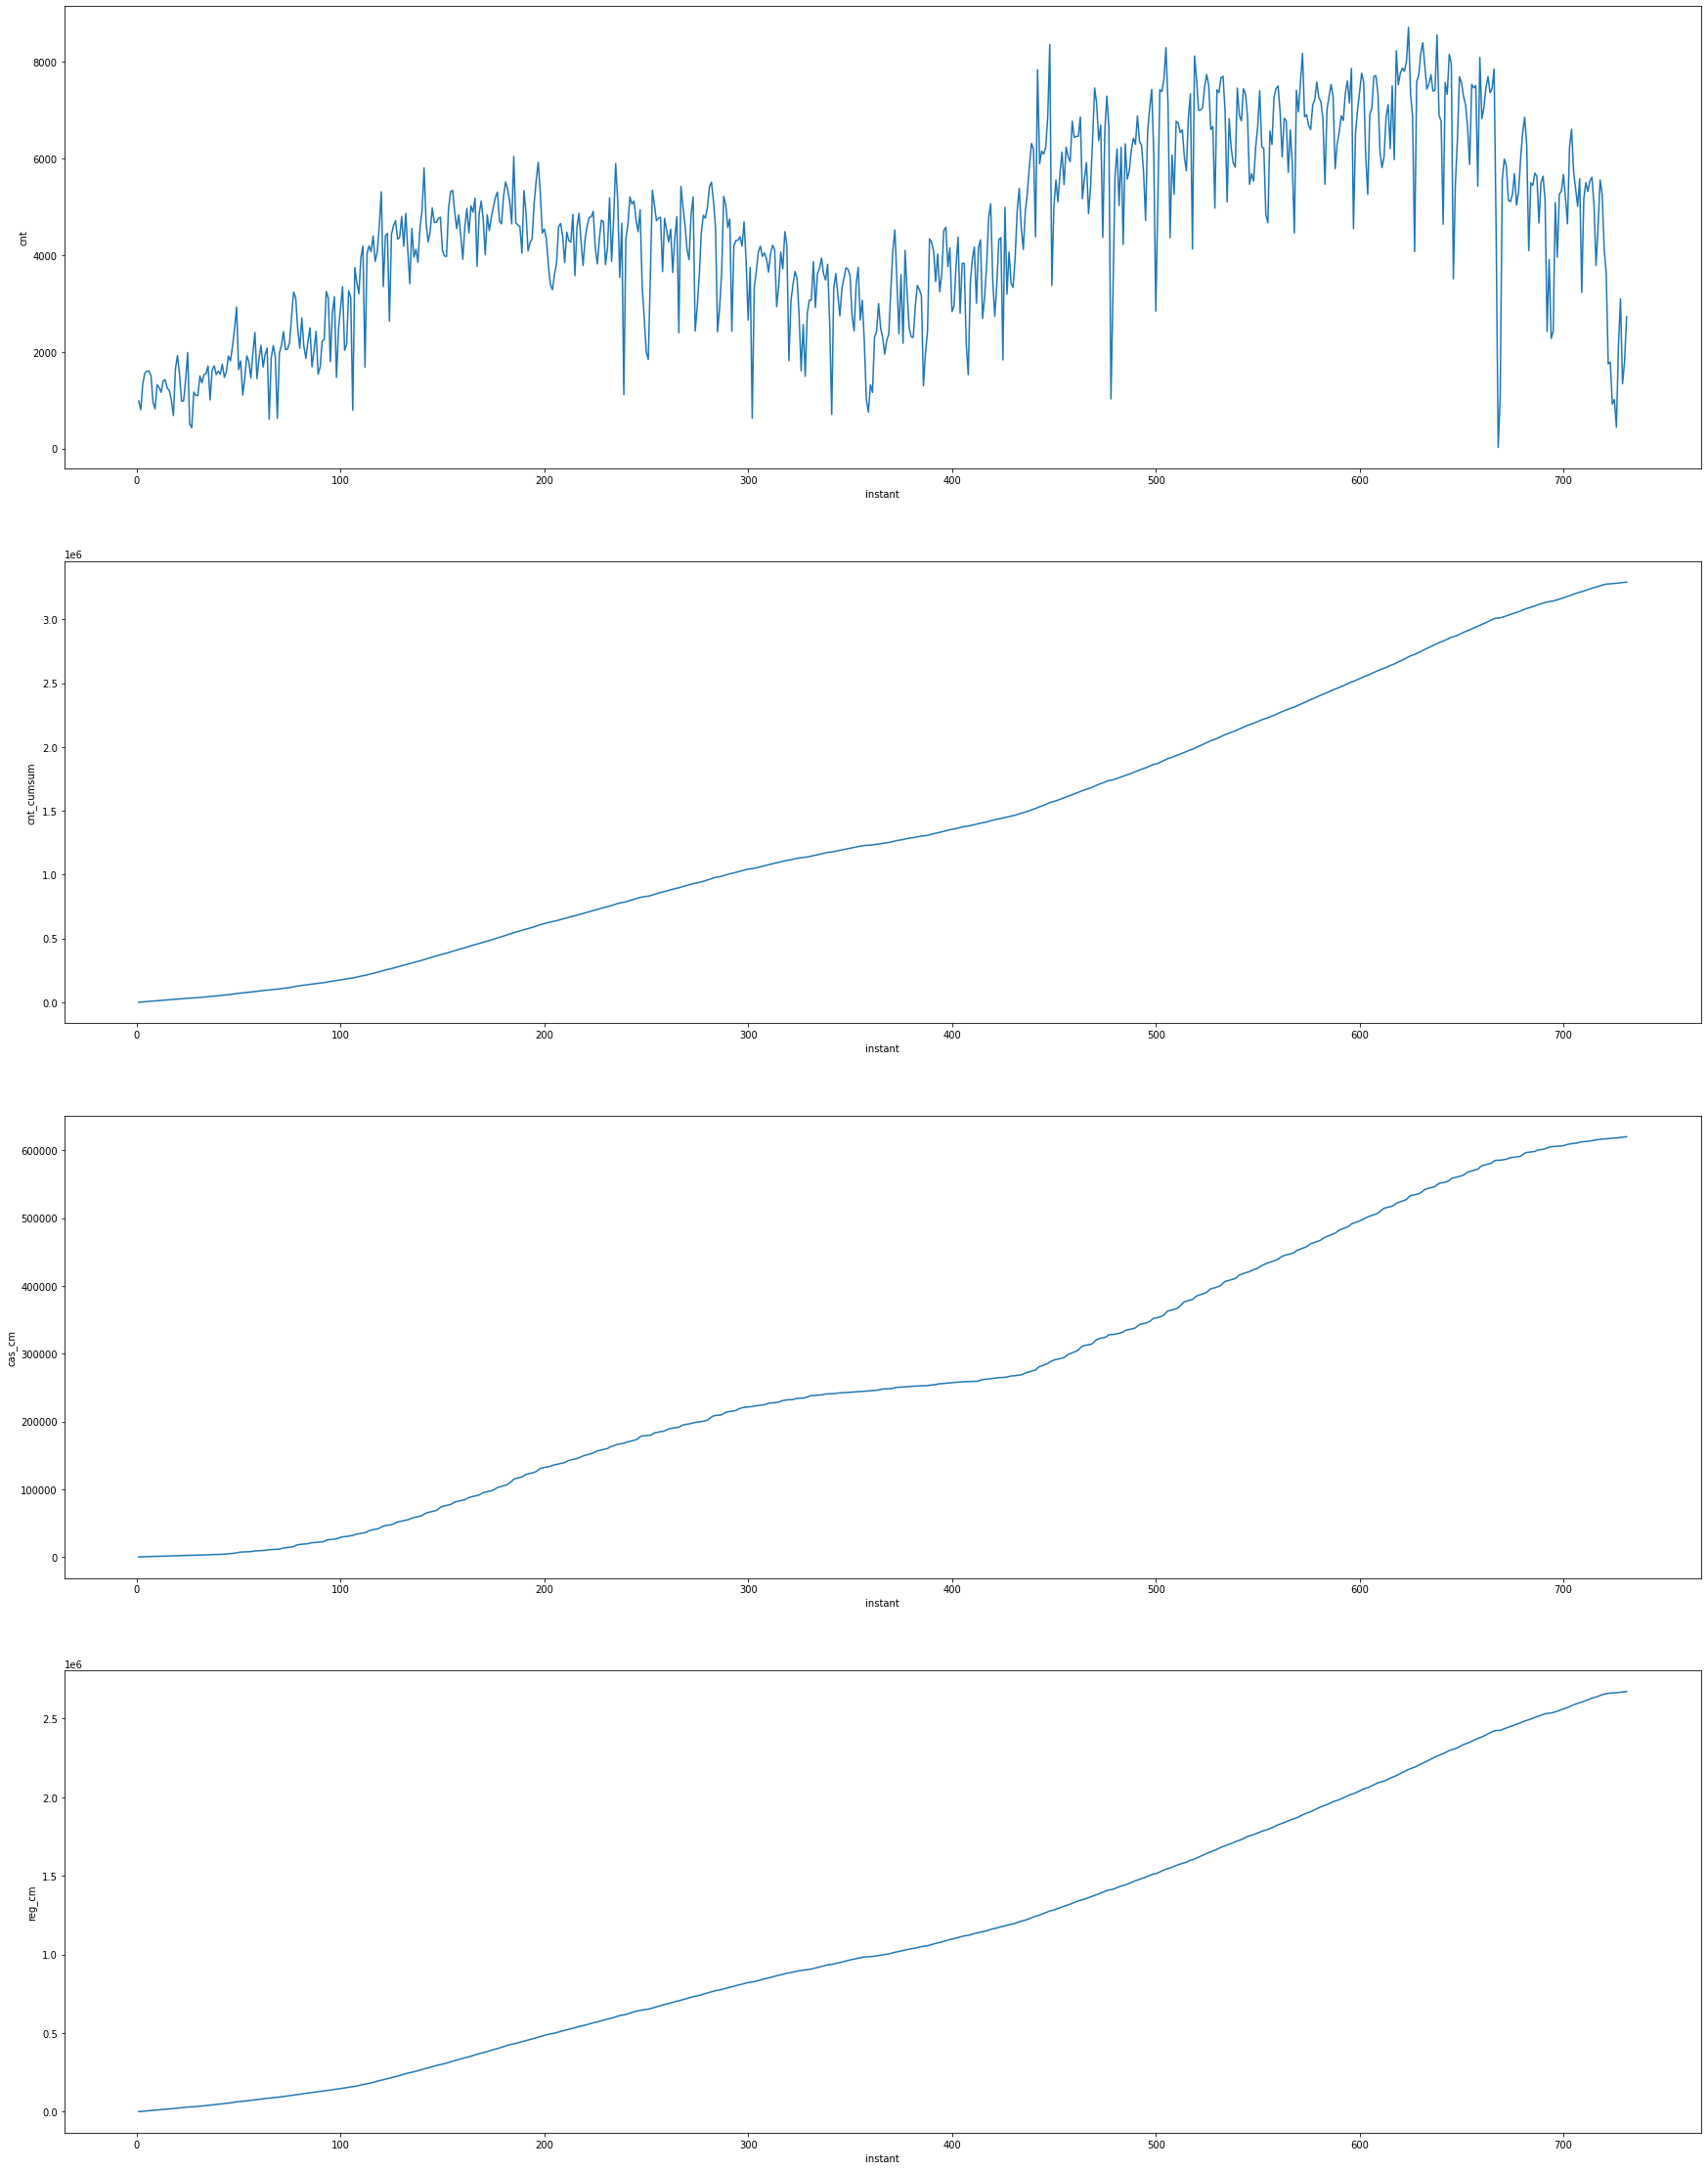

In [ ]:
fig, ax = plt.subplots(4, 1, figsize=(30, 40))

sns.lineplot(x='instant', y='cnt', data=df, ax=ax[0])
sns.lineplot(x='instant', y='cnt_cumsum', data=df, ax=ax[1])
sns.lineplot(x='instant', y='cas_cm', data=df, ax=ax[2])
sns.lineplot(x='instant', y='reg_cm', data=df, ax=ax[3])
plt.show()

In [ ]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,year_,month,Month_,temp-wind,day,bins,cnt_cumsum,cas_cm,reg_cm
0,1,2011/01/01,1,0,1,0,6,0,2,0.34,0.36,0.81,0.16,331,654,985,2011,1,Jan,0.0544,01,low,985,331,654
1,2,2011/01/02,1,0,1,0,0,0,2,0.36,0.35,0.70,0.25,131,670,801,2011,1,Jan,0.0900,02,low,1786,462,1324
2,3,2011/01/03,1,0,1,0,1,1,1,0.20,0.19,0.44,0.25,120,1229,1349,2011,1,Jan,0.0500,03,low,3135,582,2553
3,4,2011/01/04,1,0,1,0,2,1,1,0.20,0.21,0.59,0.16,108,1454,1562,2011,1,Jan,0.0320,04,low,4697,690,4007
4,5,2011/01/05,1,0,1,0,3,1,1,0.23,0.23,0.44,0.19,82,1518,1600,2011,1,Jan,0.0437,05,low,6297,772,5525


In [ ]:
df['cnt']

0       985
1       801
2      1349
3      1562
4      1600
       ... 
726    2114
727    3095
728    1341
729    1796
730    2729
Name: cnt, Length: 731, dtype: int64

In [ ]:
count_1 = df['cnt'][0:730].values

In [ ]:
count1 = []

for i in count_1:
  count1.append(i)

count1.insert(0, 0)

In [ ]:
df['cnt1'] = pd.DataFrame(count1)

In [ ]:
df[['cnt', 'cnt1']]

,cnt,cnt1
0,985,0
1,801,985
2,1349,801
3,1562,1349
4,1600,1562
...,...,...
726,2114,441
727,3095,2114
728,1341,3095
729,1796,1341


In [ ]:
df['diff'] = df['cnt'] - df['cnt1']

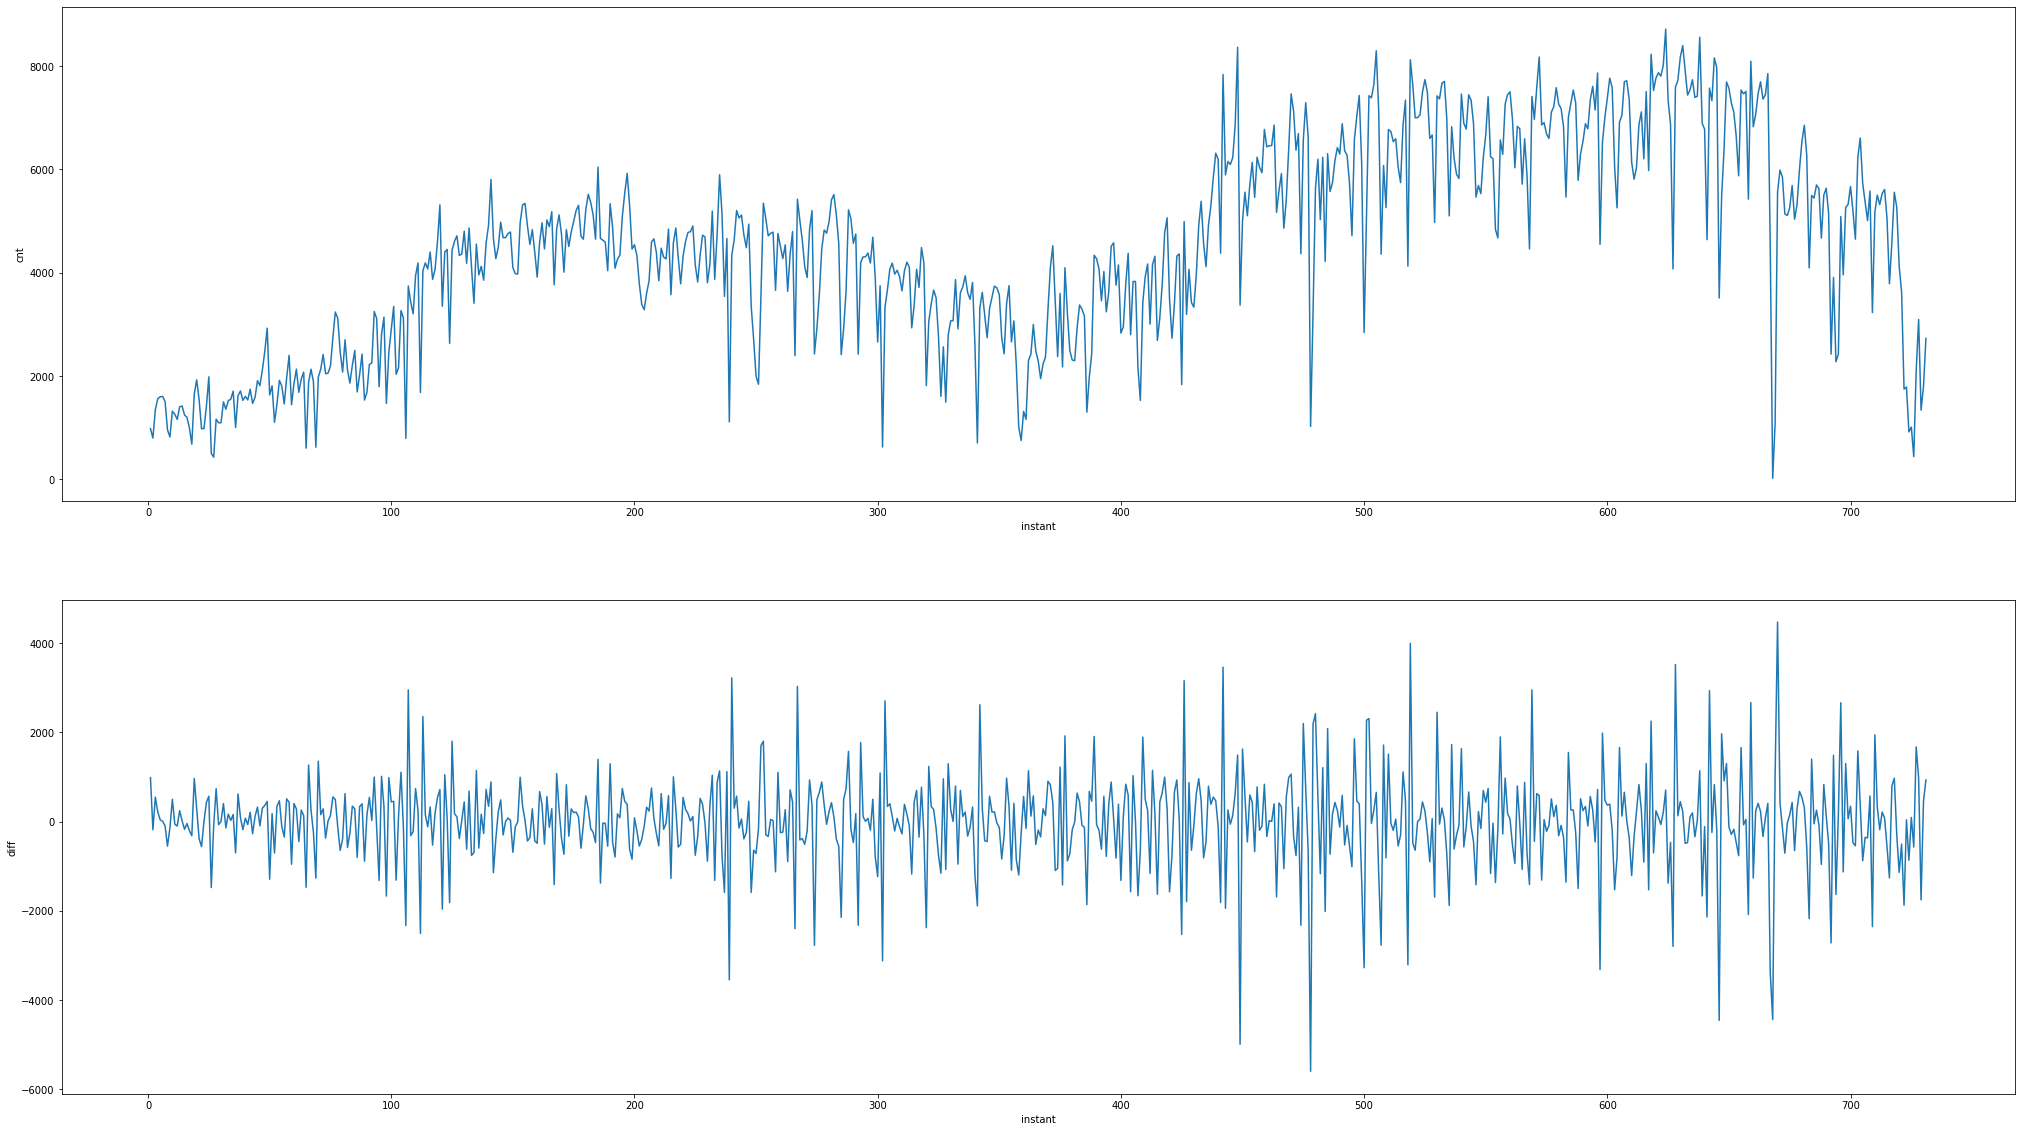

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(35, 20))

sns.lineplot(x='instant', y='cnt', data=df, ax=ax[0])
sns.lineplot(x='instant', y='diff', data=df, ax=ax[1])

plt.show()

In [ ]:
#df[(df['instant'] > 600 and df['instant'] < 700)]

In [ ]:
df_ = pd.DataFrame(df.loc[df['instant'] > 600, 'diff'])
df_.loc[df['diff'] < -4000]

,diff
645,-4455
667,-4437


In [ ]:
df.iloc[645, :]

instant              646
dteday        2012/10/07
season                 4
yr                     1
mnth                  10
holiday                0
weekday                0
workingday             0
weathersit             2
temp                0.42
atemp               0.42
hum                 0.71
windspeed           0.14
casual               781
registered          2729
cnt                 3510
year_               2012
month                 10
Month_               Oct
temp-wind         0.0588
day                   07
bins                 low
cnt_cumsum       2863409
cas_cm            559250
reg_cm           2304159
cnt1                7965
diff               -4455
Name: 645, dtype: object

In [ ]:
df.loc[df['diff'] < -4000]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,year_,month,Month_,temp-wind,day,bins,cnt_cumsum,cas_cm,reg_cm,cnt1,diff
448,449,2012/03/24,2,1,3,0,6,0,2,0.50,0.49,0.89,0.19,1033,2339,3372,2012,3,Mar,0.0950,24,low,1568678,289097,1279581,8362,-4990
477,478,2012/04/22,2,1,4,0,0,0,3,0.40,0.39,0.84,0.34,120,907,1027,2012,4,Apr,0.1360,22,low,1739685,328145,1411540,6624,-5597
645,646,2012/10/07,4,1,10,0,0,0,2,0.42,0.42,0.71,0.14,781,2729,3510,2012,10,Oct,0.0588,07,low,2863409,559250,2304159,7965,-4455
667,668,2012/10/29,4,1,10,0,1,1,3,0.44,0.44,0.88,0.36,2,20,22,2012,10,Oct,0.1584,29,low,3009640,585257,2424383,4459,-4437


In [ ]:
d = pd.DataFrame(df.iloc[645, :])
f = pd.DataFrame(df.iloc[644, :])

pd.concat([d, f], axis=1)

,645,644
instant,646,645
dteday,2012/10/07,2012/10/06
season,4,4
yr,1,1
mnth,10,10
holiday,0,0
weekday,0,6
workingday,0,0
weathersit,2,1
temp,0.42,0.55


In [ ]:
num = []

for i in df:
  if df[i].dtype in ['int64', 'float64']:
    num.append(i)

In [ ]:
df_ = pd.DataFrame(abs(df[num].corr()['cnt'])).sort_values(by='cnt', ascending=False)[:10]

df_ = df_.drop(['cnt', 'cnt_cumsum', 'instant', 'atemp'], axis=0)

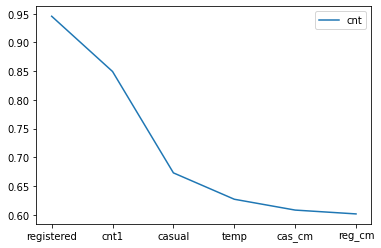

In [ ]:
df_.plot()
plt.show()

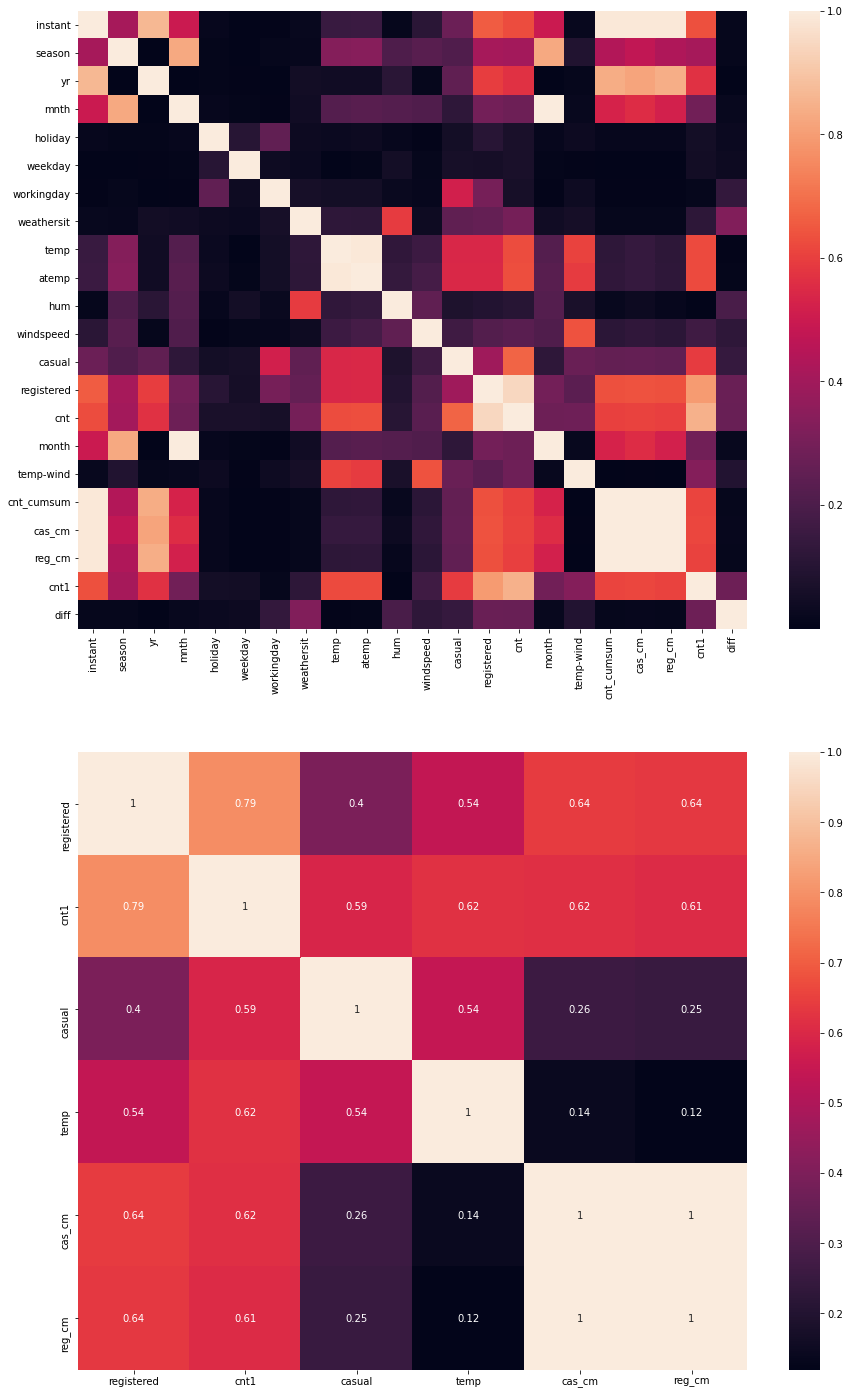

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(15, 25))

sns.heatmap(data=abs(df[num].corr()), ax=ax[0])

new_num = [i for i in df_.index]
sns.heatmap(data=df[new_num].corr(), ax=ax[1], annot=True)

plt.show()

In [ ]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,year_,month,Month_,temp-wind,day,bins,cnt_cumsum,cas_cm,reg_cm,cnt1,diff
0,1,2011/01/01,1,0,1,0,6,0,2,0.34,0.36,0.81,0.16,331,654,985,2011,1,Jan,0.0544,01,low,985,331,654,0,985
1,2,2011/01/02,1,0,1,0,0,0,2,0.36,0.35,0.70,0.25,131,670,801,2011,1,Jan,0.0900,02,low,1786,462,1324,985,-184
2,3,2011/01/03,1,0,1,0,1,1,1,0.20,0.19,0.44,0.25,120,1229,1349,2011,1,Jan,0.0500,03,low,3135,582,2553,801,548
3,4,2011/01/04,1,0,1,0,2,1,1,0.20,0.21,0.59,0.16,108,1454,1562,2011,1,Jan,0.0320,04,low,4697,690,4007,1349,213
4,5,2011/01/05,1,0,1,0,3,1,1,0.23,0.23,0.44,0.19,82,1518,1600,2011,1,Jan,0.0437,05,low,6297,772,5525,1562,38


In [ ]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,month,temp-wind,cnt_cumsum,cas_cm,reg_cm,cnt1,diff
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,7.310000e+02,731.000000,7.310000e+02,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495376,0.474323,0.627907,0.190383,848.176471,3656.172367,4504.348837,6.519836,0.092068,1.391706e+06,270577.601915,1.121129e+06,4500.615595,3.733242
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183115,0.162928,0.142660,0.077679,686.622488,1560.256377,1937.211452,3.451913,0.046337,9.938074e+05,191061.306511,8.030621e+05,1943.257574,1065.145543
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.060000,0.080000,0.000000,0.020000,2.000000,20.000000,22.000000,1.000000,0.009500,9.850000e+02,331.000000,6.540000e+02,0.000000,-5597.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.340000,0.520000,0.130000,315.500000,2497.000000,3152.000000,4.000000,0.057500,5.374575e+05,110740.000000,4.267175e+05,3152.000000,-456.500000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.490000,0.630000,0.180000,713.000000,3662.000000,4548.000000,7.000000,0.087000,1.245397e+06,247938.000000,9.974590e+05,4548.000000,55.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.610000,0.730000,0.230000,1096.000000,4776.500000,5956.000000,10.000000,0.122400,2.189422e+06,424418.000000,1.765004e+06,5956.000000,484.500000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.860000,0.840000,0.970000,0.510000,3410.000000,6946.000000,8714.000000,12.000000,0.258400,3.292679e+06,620017.000000,2.672662e+06,8714.000000,4470.000000


In [ ]:
ind = pd.DataFrame(round(df.groupby('weekday')['temp'].mean()*100,2)).sort_values(by='temp', ascending=False).index
val = pd.DataFrame(round(df.groupby('weekday')['temp'].mean()*100,2)).sort_values(by='temp', ascending=False).values

val = np.squeeze(val)

df_ = pd.DataFrame(zip(ind, val)).rename(columns={0:'ind', 1:'val'})

#df_['ind'] = df_['ind'].astype(int) 

def add_weekdays(x):
  if x == 0:
    return 'Sunday'
  elif x == 1:
    return 'Monday'
  elif x == 2:
    return 'Tuesday'
  elif x == 3:
    return 'Wednesday'
  elif x == 4:
    return 'Thursday'
  elif x == 5:
    return 'Friday'
  elif x == 6:
    return 'Saturday'
  else:
    return np.nan


df_['Days'] = df_['ind'].apply(add_weekdays)

In [ ]:
df_

,ind,val,Days
0,4,50.49,Thursday
1,3,50.48,Wednesday
2,2,50.40,Tuesday
3,5,49.51,Friday
4,1,49.32,Monday
5,0,48.41,Sunday
6,6,48.17,Saturday


In [ ]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,year_,month,Month_,temp-wind,day,bins,cnt_cumsum,cas_cm,reg_cm,cnt1,diff
0,1,2011/01/01,1,0,1,0,6,0,2,0.34,0.36,0.81,0.16,331,654,985,2011,1,Jan,0.0544,01,low,985,331,654,0,985
1,2,2011/01/02,1,0,1,0,0,0,2,0.36,0.35,0.70,0.25,131,670,801,2011,1,Jan,0.0900,02,low,1786,462,1324,985,-184
2,3,2011/01/03,1,0,1,0,1,1,1,0.20,0.19,0.44,0.25,120,1229,1349,2011,1,Jan,0.0500,03,low,3135,582,2553,801,548
3,4,2011/01/04,1,0,1,0,2,1,1,0.20,0.21,0.59,0.16,108,1454,1562,2011,1,Jan,0.0320,04,low,4697,690,4007,1349,213
4,5,2011/01/05,1,0,1,0,3,1,1,0.23,0.23,0.44,0.19,82,1518,1600,2011,1,Jan,0.0437,05,low,6297,772,5525,1562,38


In [ ]:
pd.DataFrame(round(df.groupby(['season', 'weathersit'])['temp'].mean()*100, 2))

temp
season weathersit       
1      1           30.14
       2           29.32
       3           26.75
2      1           56.33
       2           52.03
       3           36.67
3      1           72.12
       2           67.48
       3           59.25
4      1           40.48
       2           44.65
       3           45.60

In [ ]:
df['cnt_bin'] = pd.qcut(df['cnt'], 5, ['0', '1', '2', '3', '4'])

In [ ]:
df['cnt_bin'].value_counts()

0    147
4    146
3    146
2    146
1    146
Name: cnt_bin, dtype: int64

In [ ]:
def change_date(x):
  if '/' in x:
    x = x.replace('/', '').split()
    x = np.squeeze(x)
    x = x.astype(int)
    return x

df['new_date'] = df['dteday'].apply(change_date)

In [ ]:
pd.DataFrame(abs(df.corr()['new_date'])).sort_values(by='new_date', ascending=False).drop(['yr', 'instant', 'cnt1'])[:5]

,new_date
new_date,1.000000
reg_cm,0.875132
cnt_cumsum,0.871410
cas_cm,0.854325
registered,0.613068


In [ ]:
df.groupby('season')['temp'].mean()

season
1    0.297680
2    0.544185
3    0.706596
4    0.422865
Name: temp, dtype: float64

In [ ]:
s1 = [i for i in df[df['season'] == 1]['mnth'].value_counts().index]
s2 = [i for i in df[df['season'] == 2]['mnth'].value_counts().index]
s3 = [i for i in df[df['season'] == 3]['mnth'].value_counts().index]
s4 = [i for i in df[df['season'] == 4]['mnth'].value_counts().index]

s_all = [s1, s2, s3, s4]
seas = [1, 2, 3, 4]

df_ = pd.DataFrame(np.array(s_all))

df__ = pd.DataFrame(seas)
pd.concat([df__, df_], axis=1)

,0,0,1,2,3
0,1,1,2,3,12
1,2,5,4,6,3
2,3,8,7,9,6
3,4,10,11,12,9


In [ ]:
seas

[1, 2, 3, 4]

In [ ]:
df[df['yr'] == 0][df['season'] == 3][['temp']].describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,temp
count,94.000000
mean,0.701277
std,0.073239
min,0.470000
25%,0.670000
50%,0.710000
75%,0.747500
max,0.850000


In [ ]:
df[df['yr'] == 0][df['season'] == 2][['temp']].describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,temp
count,92.000000
mean,0.534457
std,0.140551
min,0.250000
25%,0.440000
50%,0.540000
75%,0.640000
max,0.810000
